# 기본 라이브러리

In [1]:
from sklearn.datasets import make_blobs, make_moons, make_circles
import matplotlib.pyplot as plt
import numpy as np

# 데이터 종류: make_blobs #1

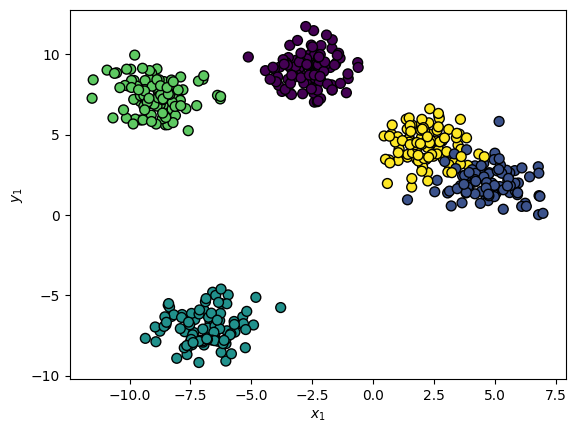

In [2]:
x, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=42)
plt.scatter(x[:,0], x[:,1], marker='o', c=y, s=50, edgecolors='k', linewidths=1)
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')
plt.show()

## ML 알고리즘 1: SVM

### Linear

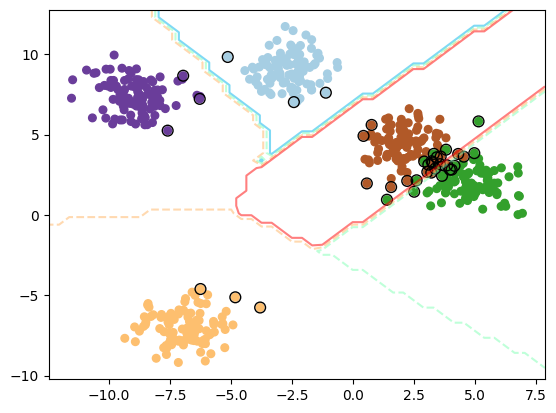

In [3]:
from sklearn import svm

linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(x,y)
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = linear_svm.predict(xy).reshape(XX.shape)

n_classes = len(np.unique(y))
contours = ax.contour(XX, YY, z_l, levels=np.arange(n_classes+1) - 0.5, cmap=plt.cm.get_cmap('rainbow', n_classes), alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(linear_svm.support_vectors_[:,0], linear_svm.support_vectors_[:,1], s=60, facecolors='none', edgecolors='k')
plt.show()

### Hyper-Plane, Support Vector

ValueError: cannot reshape array of size 8000 into shape (40,40)

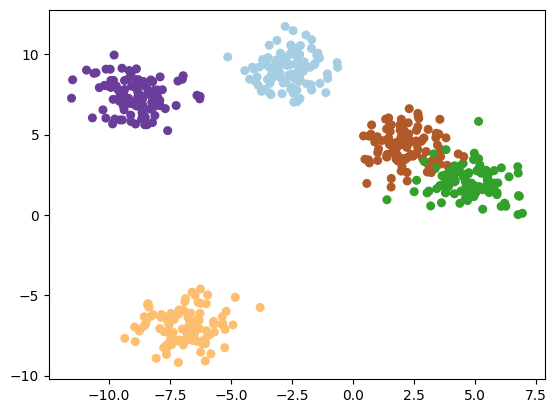

In [40]:
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 40)
yy = np.linspace(ylim[0], ylim[1], 40)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = linear_svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, z_l, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])

ax.scatter(linear_svm.support_vectors_[:,0], linear_svm.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(-12.0, 8.0)

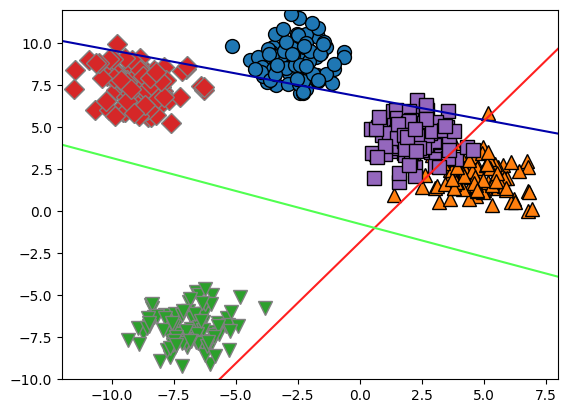

In [4]:
from sklearn.svm import LinearSVC
import mglearn

linear_svm = LinearSVC()
linear_svm.fit(x,y)

coefs = linear_svm.coef_
intercepts = linear_svm.intercept_

mglearn.discrete_scatter(x[:,0], x[:,1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(coefs, intercepts, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 12)
plt.xlim(-12, 8)


### Non-Linear

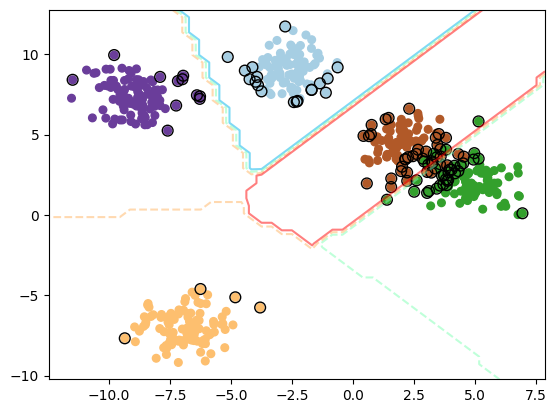

In [5]:
nonlinear_svm = svm.SVC(kernel='rbf')
nonlinear_svm.fit(x,y)
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_nl = nonlinear_svm.predict(xy).reshape(XX.shape)

n_classes = len(np.unique(y))
contours = ax.contour(XX, YY, z_nl, levels=np.arange(n_classes+1) - 0.5, cmap=plt.cm.get_cmap('rainbow', n_classes), alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(nonlinear_svm.support_vectors_[:,0], nonlinear_svm.support_vectors_[:,1], s=60, facecolors='none', edgecolors='k')
plt.show()

## ML 알고리즘 2: KMeans

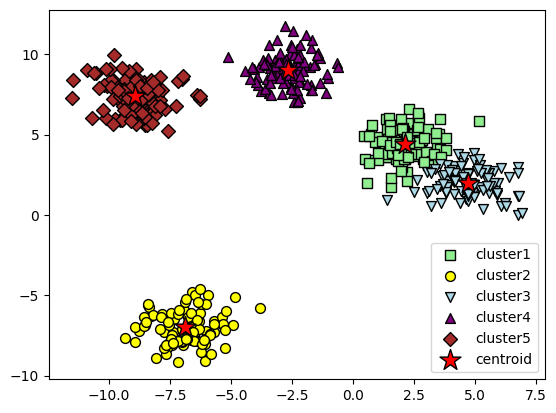

In [6]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, init='random', n_init=10, max_iter=500, tol=1e-04, random_state=0)
y_km = km.fit_predict(x)

plt.scatter(x[y_km==0,0], x[y_km==0,1], s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster1')
plt.scatter(x[y_km==1,0], x[y_km==1,1], s=50, c='yellow', marker='o', edgecolors='black', label='cluster2')
plt.scatter(x[y_km==2,0], x[y_km==2,1], s=50, c='lightblue', marker='v', edgecolors='black', label='cluster3')
plt.scatter(x[y_km==3,0], x[y_km==3,1], s=50, c='purple', marker='^', edgecolors='black', label='cluster4')
plt.scatter(x[y_km==4,0], x[y_km==4,1], s=50, c='brown', marker='D', edgecolors='black', label='cluster5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', edgecolors='black', label='centroid')
plt.legend(scatterpoints=1)
plt.show()

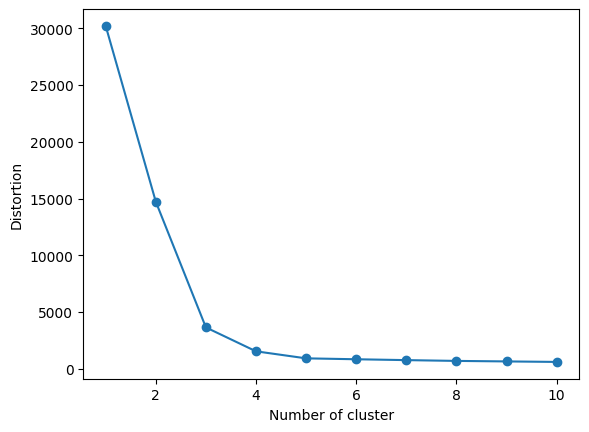

In [7]:
distortions = []
for i in range(1,11):
    km = KMeans(
        n_clusters=i,
        init='random',
        n_init=10,
        max_iter=500,
        tol=1e-04,
        random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()

# 데이터 종류: make_blobs #2

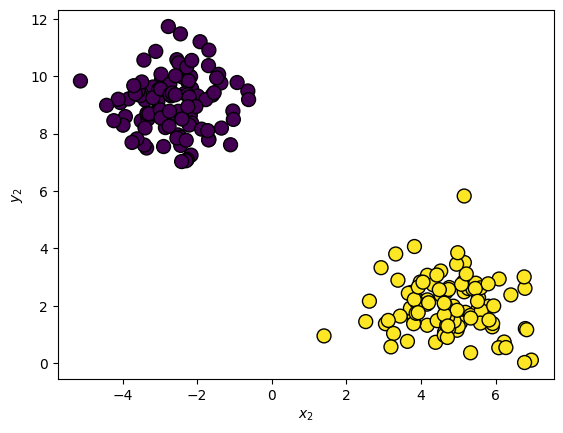

In [8]:
x, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42)
plt.scatter(x[:,0], x[:,1], marker='o', c=y, s=100, edgecolors='k', linewidths=1)
plt.xlabel('$x_2$')
plt.ylabel('$y_2$')
plt.show()

## ML 알고리즘 1: SVM

### Linear

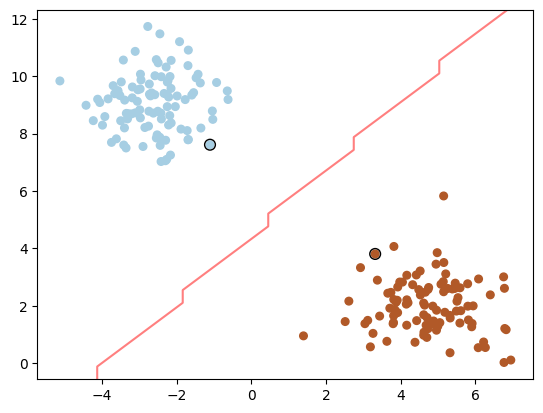

In [9]:
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(x,y)

plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = linear_svm.predict(xy).reshape(XX.shape)

n_classes = len(np.unique(y))
contours = ax.contour(XX, YY, z_l, levels=np.arange(n_classes+1) - 0.5, cmap=plt.cm.get_cmap('rainbow', n_classes), alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(linear_svm.support_vectors_[:,0], linear_svm.support_vectors_[:,1], s=60, facecolors='none', edgecolors='k')
plt.show()

### Hyper-Plane, Support Vector

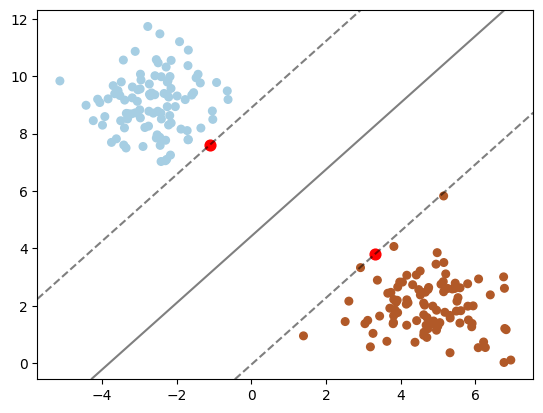

In [10]:
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = linear_svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, z_l, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])

ax.scatter(linear_svm.support_vectors_[:,0], linear_svm.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

### Non-Linear

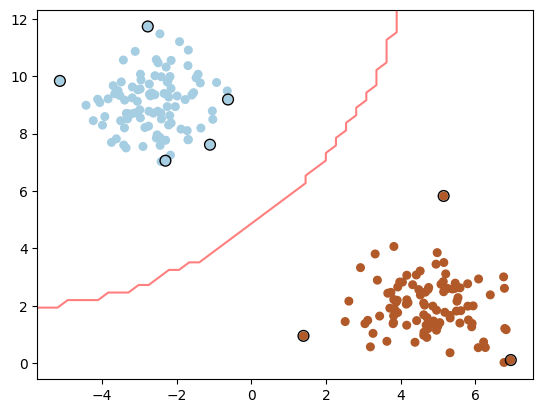

In [11]:
nonlinear_svm = svm.SVC(kernel='rbf')
nonlinear_svm.fit(x,y)
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_nl = nonlinear_svm.predict(xy).reshape(XX.shape)

n_classes = len(np.unique(y))
contours = ax.contour(XX, YY, z_nl, levels=np.arange(n_classes+1) - 0.5, cmap=plt.cm.get_cmap('rainbow', n_classes), alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(nonlinear_svm.support_vectors_[:,0], nonlinear_svm.support_vectors_[:,1], s=60, facecolors='none', edgecolors='k')
plt.show()

### Hyper-Plane, Support Vector

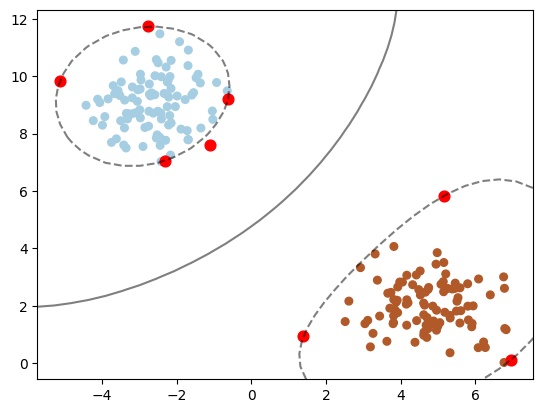

In [13]:
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = nonlinear_svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, z_l, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])

ax.scatter(nonlinear_svm.support_vectors_[:,0], nonlinear_svm.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

## ML 알고리즘 2: KMeans

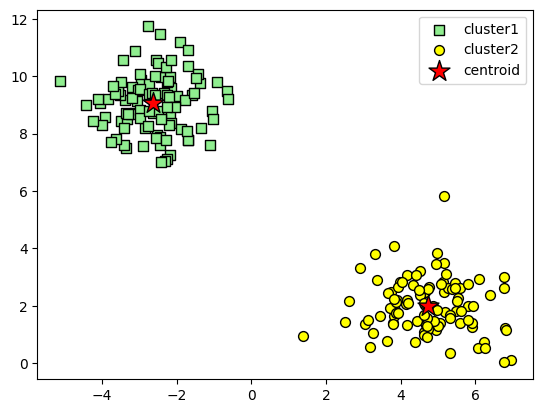

In [14]:
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=500, tol=1e-04, random_state=0)
y_km = km.fit_predict(x)

plt.scatter(x[y_km==0,0], x[y_km==0,1], s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster1')
plt.scatter(x[y_km==1,0], x[y_km==1,1], s=50, c='yellow', marker='o', edgecolors='black', label='cluster2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', edgecolors='black', label='centroid')
plt.legend(scatterpoints=1)
plt.show()

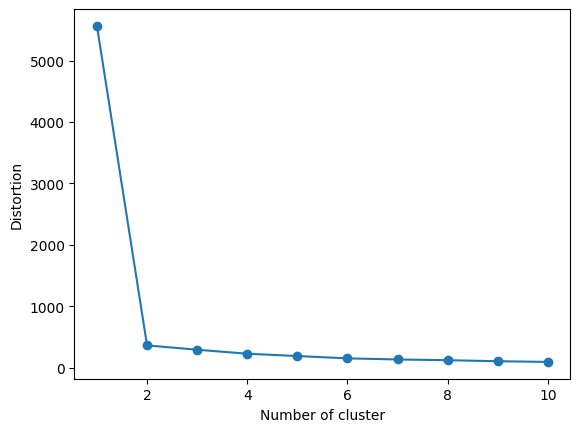

In [15]:
distortions = []
for i in range(1,11):
    km = KMeans(
        n_clusters=i,
        init='random',
        n_init=10,
        max_iter=500,
        tol=1e-04,
        random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()

# 데이터 종류: make_moons #1

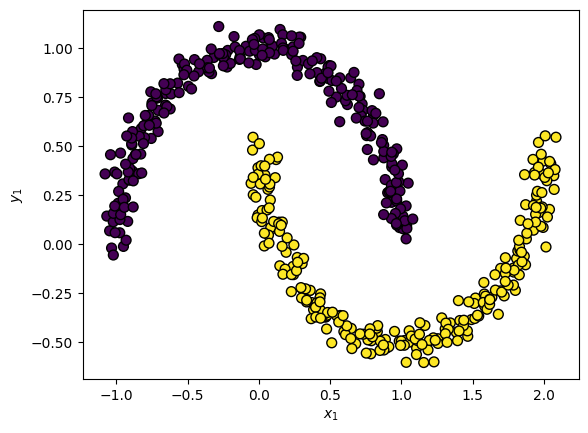

In [16]:
x, y = make_moons(n_samples=500, noise=0.05, random_state=42)
plt.scatter(x[:,0], x[:,1], marker='o', c=y, s=50, edgecolors='k', linewidths=1)
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')
plt.show()

## ML 알고리즘 1: SVM

### Linear

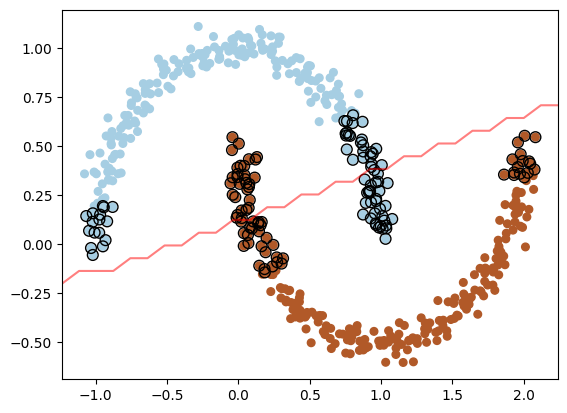

In [17]:
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(x,y)

plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = linear_svm.predict(xy).reshape(XX.shape)

n_classes = len(np.unique(y))
contours = ax.contour(XX, YY, z_l, levels=np.arange(n_classes+1) - 0.5, cmap=plt.cm.get_cmap('rainbow', n_classes), alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(linear_svm.support_vectors_[:,0], linear_svm.support_vectors_[:,1], s=60, facecolors='none', edgecolors='k')
plt.show()

### Hyper-Plane, Support Vector

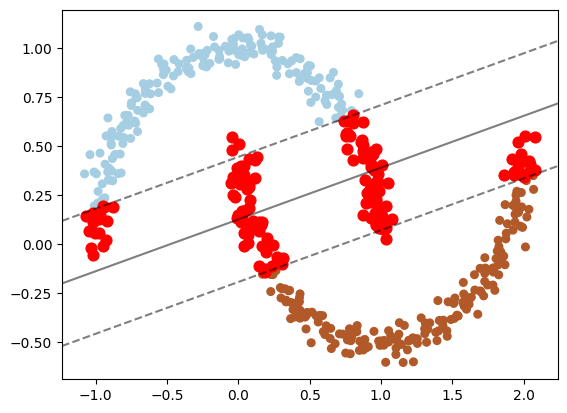

In [18]:
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = linear_svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, z_l, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])

ax.scatter(linear_svm.support_vectors_[:,0], linear_svm.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

### Non-Linear

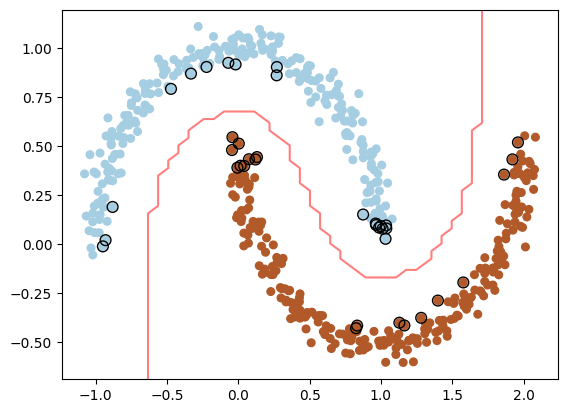

In [19]:
nonlinear_svm = svm.SVC(kernel='rbf')
nonlinear_svm.fit(x,y)
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_nl = nonlinear_svm.predict(xy).reshape(XX.shape)

n_classes = len(np.unique(y))
contours = ax.contour(XX, YY, z_nl, levels=np.arange(n_classes+1) - 0.5, cmap=plt.cm.get_cmap('rainbow', n_classes), alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(nonlinear_svm.support_vectors_[:,0], nonlinear_svm.support_vectors_[:,1], s=60, facecolors='none', edgecolors='k')
plt.show()

### Hyper-Plane, Support Vector

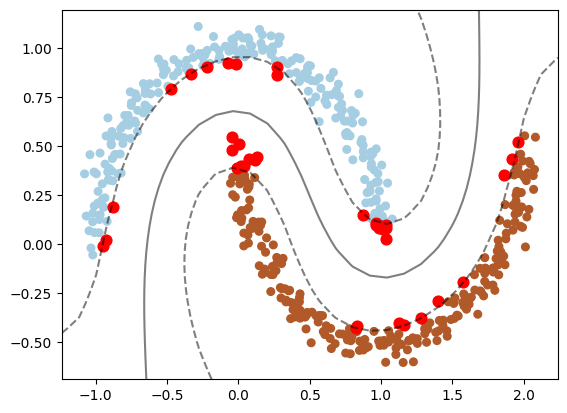

In [20]:
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = nonlinear_svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, z_l, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])

ax.scatter(nonlinear_svm.support_vectors_[:,0], nonlinear_svm.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

## ML 알고리즘 2: KMeans

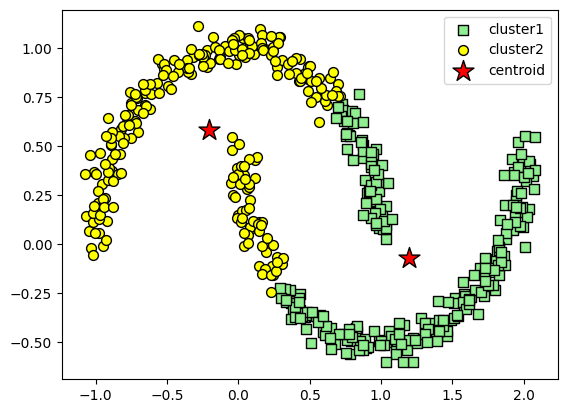

In [21]:
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=500, tol=1e-04, random_state=0)
y_km = km.fit_predict(x)

plt.scatter(x[y_km==0,0], x[y_km==0,1], s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster1')
plt.scatter(x[y_km==1,0], x[y_km==1,1], s=50, c='yellow', marker='o', edgecolors='black', label='cluster2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', edgecolors='black', label='centroid')
plt.legend(scatterpoints=1)
plt.show()

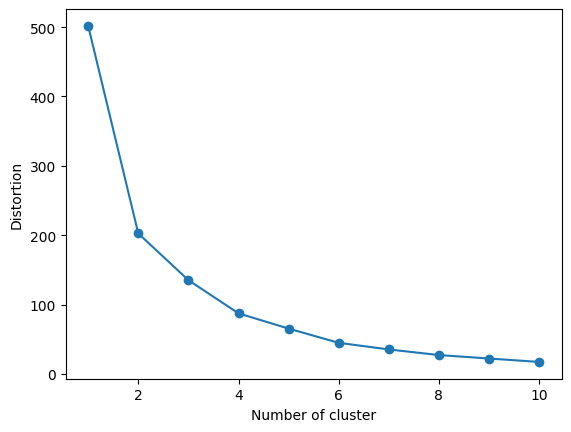

In [22]:
distortions = []
for i in range(1,11):
    km = KMeans(
        n_clusters=i,
        init='random',
        n_init=10,
        max_iter=500,
        tol=1e-04,
        random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()

# 데이터 종류: make_moons #2

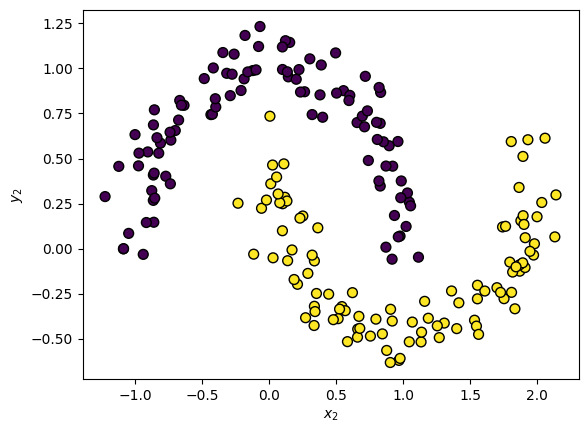

In [24]:
x, y = make_moons(n_samples=200, noise=0.1, random_state=42)
plt.scatter(x[:,0], x[:,1], marker='o', c=y, s=50, edgecolors='k', linewidths=1)
plt.xlabel('$x_2$')
plt.ylabel('$y_2$')
plt.show()

## ML 알고리즘 1: SVM

### Linear

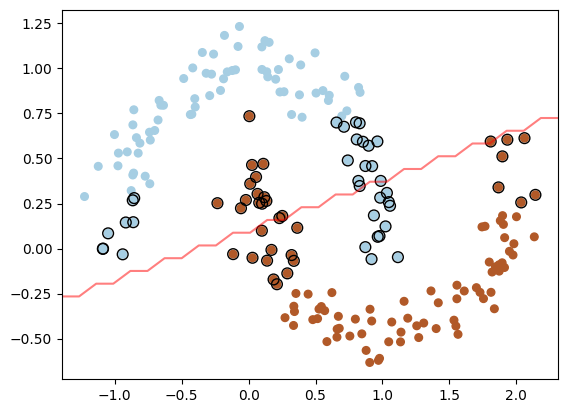

In [25]:
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(x,y)

plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = linear_svm.predict(xy).reshape(XX.shape)

n_classes = len(np.unique(y))
contours = ax.contour(XX, YY, z_l, levels=np.arange(n_classes+1) - 0.5, cmap=plt.cm.get_cmap('rainbow', n_classes), alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(linear_svm.support_vectors_[:,0], linear_svm.support_vectors_[:,1], s=60, facecolors='none', edgecolors='k')
plt.show()

### Hyper-Plane, Support Vector

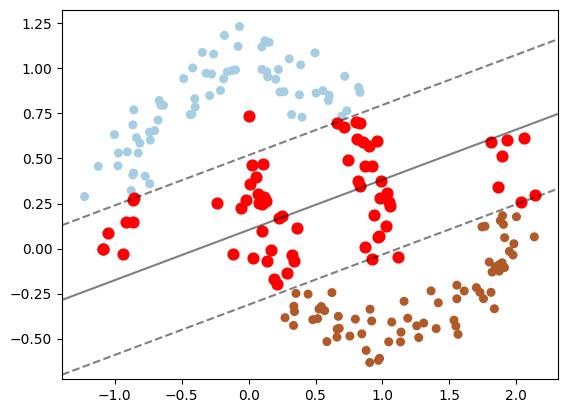

In [26]:
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = linear_svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, z_l, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])

ax.scatter(linear_svm.support_vectors_[:,0], linear_svm.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

### Non-Linear

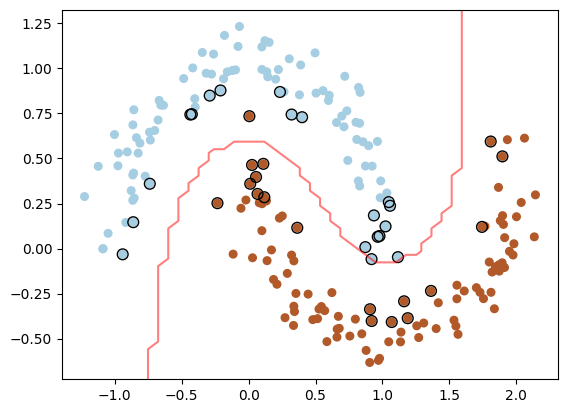

In [27]:
nonlinear_svm = svm.SVC(kernel='rbf')
nonlinear_svm.fit(x,y)
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_nl = nonlinear_svm.predict(xy).reshape(XX.shape)

n_classes = len(np.unique(y))
contours = ax.contour(XX, YY, z_nl, levels=np.arange(n_classes+1) - 0.5, cmap=plt.cm.get_cmap('rainbow', n_classes), alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(nonlinear_svm.support_vectors_[:,0], nonlinear_svm.support_vectors_[:,1], s=60, facecolors='none', edgecolors='k')
plt.show()

### Hyper-Plane, Support Vector

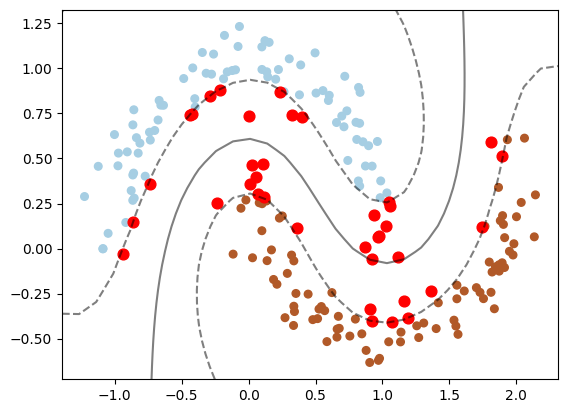

In [28]:
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = nonlinear_svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, z_l, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])

ax.scatter(nonlinear_svm.support_vectors_[:,0], nonlinear_svm.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

## ML 알고리즘 2: KMeans

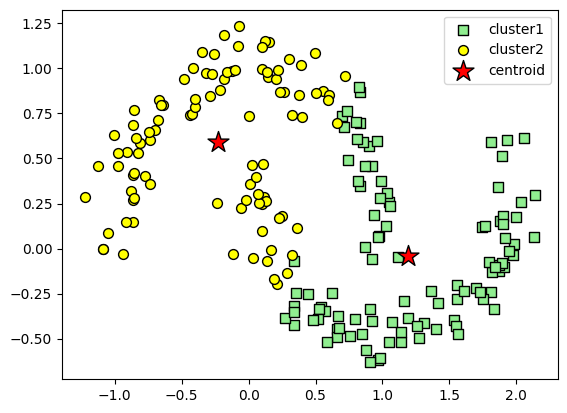

In [29]:
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=500, tol=1e-04, random_state=0)
y_km = km.fit_predict(x)

plt.scatter(x[y_km==0,0], x[y_km==0,1], s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster1')
plt.scatter(x[y_km==1,0], x[y_km==1,1], s=50, c='yellow', marker='o', edgecolors='black', label='cluster2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', edgecolors='black', label='centroid')
plt.legend(scatterpoints=1)
plt.show()

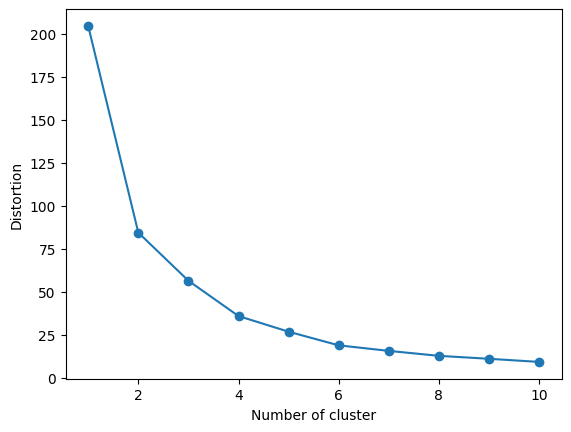

In [25]:
distortions = []
for i in range(1,11):
    km = KMeans(
        n_clusters=i,
        init='random',
        n_init=10,
        max_iter=500,
        tol=1e-04,
        random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()

# 데이터 종류: make_circles #1

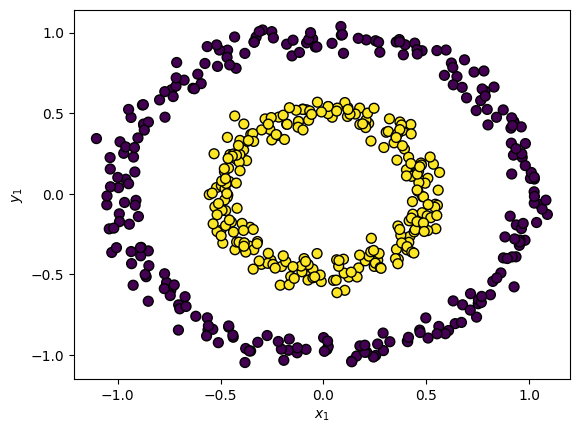

In [30]:
x,y = make_circles(n_samples=500, shuffle=True, noise=0.05, random_state=None, factor=0.5)
plt.scatter(x[:,0], x[:,1], marker='o', c=y, s=50, edgecolors='k', linewidths=1)
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')
plt.show()

## ML 알고리즘 1: SVM

### Linear

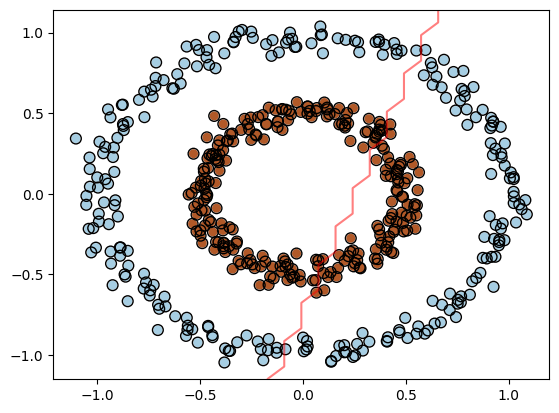

In [31]:
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(x,y)

plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = linear_svm.predict(xy).reshape(XX.shape)

n_classes = len(np.unique(y))
contours = ax.contour(XX, YY, z_l, levels=np.arange(n_classes+1) - 0.5, cmap=plt.cm.get_cmap('rainbow', n_classes), alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(linear_svm.support_vectors_[:,0], linear_svm.support_vectors_[:,1], s=60, facecolors='none', edgecolors='k')
plt.show()

### Hyper-Plane, Support Vector

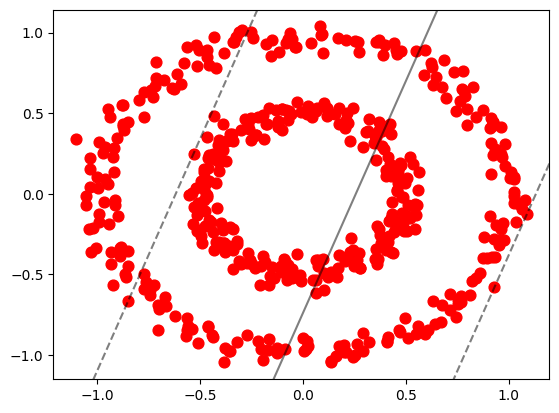

In [32]:
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = linear_svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, z_l, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])

ax.scatter(linear_svm.support_vectors_[:,0], linear_svm.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

### Non-Linear

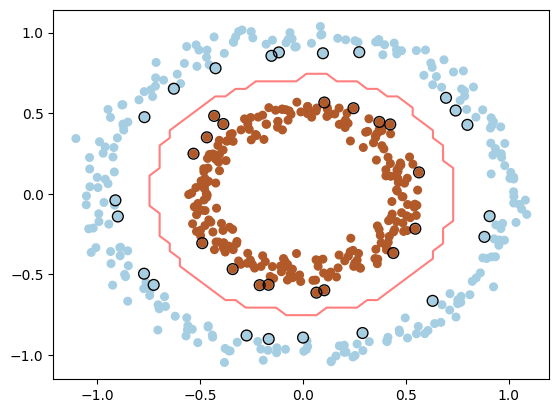

In [33]:
nonlinear_svm = svm.SVC(kernel='rbf')
nonlinear_svm.fit(x,y)
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_nl = nonlinear_svm.predict(xy).reshape(XX.shape)

n_classes = len(np.unique(y))
contours = ax.contour(XX, YY, z_nl, levels=np.arange(n_classes+1) - 0.5, cmap=plt.cm.get_cmap('rainbow', n_classes), alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(nonlinear_svm.support_vectors_[:,0], nonlinear_svm.support_vectors_[:,1], s=60, facecolors='none', edgecolors='k')
plt.show()

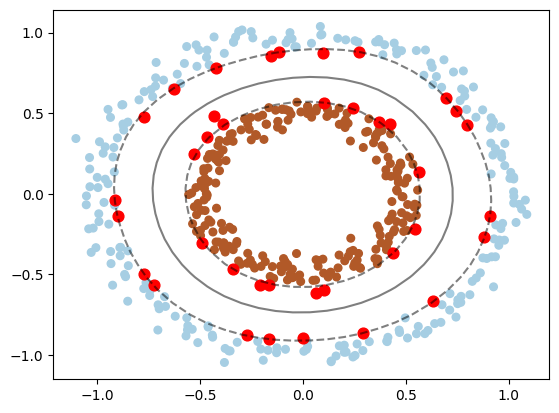

In [34]:
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = nonlinear_svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, z_l, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])

ax.scatter(nonlinear_svm.support_vectors_[:,0], nonlinear_svm.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

## ML 알고리즘 2: KMeans

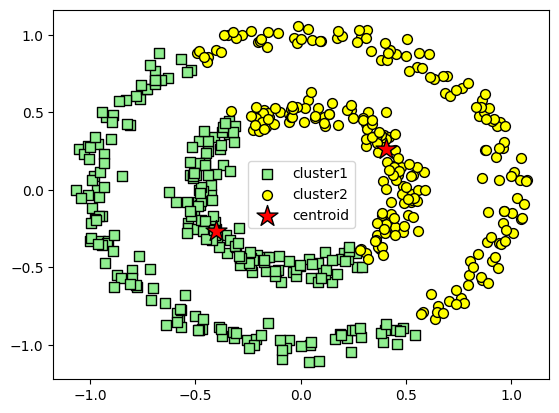

In [30]:
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=500, tol=1e-04, random_state=0)
y_km = km.fit_predict(x)

plt.scatter(x[y_km==0,0], x[y_km==0,1], s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster1')
plt.scatter(x[y_km==1,0], x[y_km==1,1], s=50, c='yellow', marker='o', edgecolors='black', label='cluster2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', edgecolors='black', label='centroid')
plt.legend(scatterpoints=1)
plt.show()

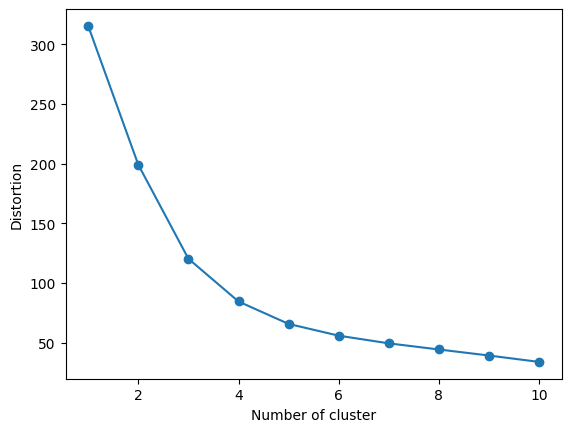

In [31]:
distortions = []
for i in range(1,11):
    km = KMeans(
        n_clusters=i,
        init='random',
        n_init=10,
        max_iter=500,
        tol=1e-04,
        random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()

# 데이터 종류: make_circles #2

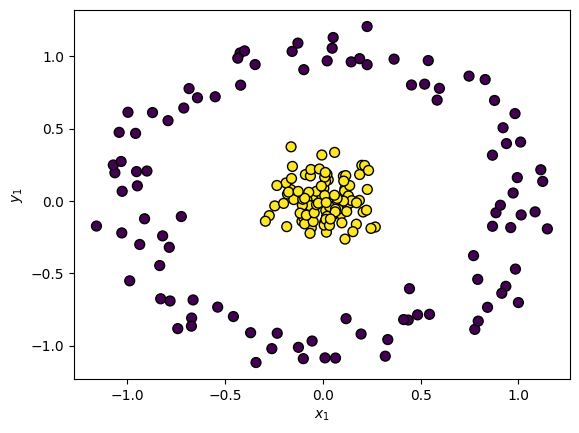

In [35]:
x,y = make_circles(n_samples=200, noise=0.1, random_state=None, factor=0.1)
plt.scatter(x[:,0], x[:,1], marker='o', c=y, s=50, edgecolors='k', linewidths=1)
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')
plt.show()

## ML 알고리즘 1: SVM

### Linear

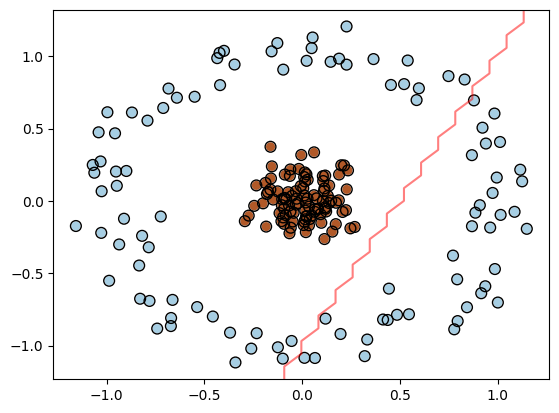

In [36]:
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(x,y)

plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = linear_svm.predict(xy).reshape(XX.shape)

n_classes = len(np.unique(y))
contours = ax.contour(XX, YY, z_l, levels=np.arange(n_classes+1) - 0.5, cmap=plt.cm.get_cmap('rainbow', n_classes), alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(linear_svm.support_vectors_[:,0], linear_svm.support_vectors_[:,1], s=60, facecolors='none', edgecolors='k')
plt.show()

### Hyper-Plane, Support Vector

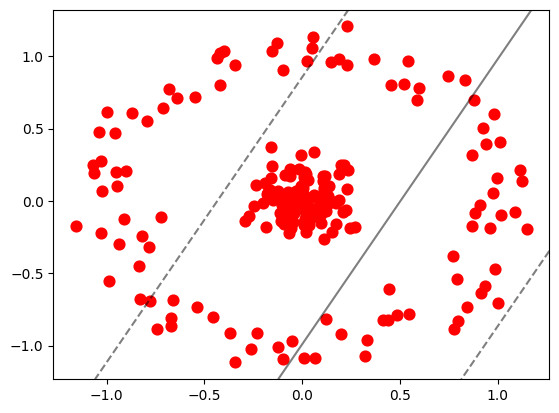

In [37]:
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = linear_svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, z_l, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])

ax.scatter(linear_svm.support_vectors_[:,0], linear_svm.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

### Non-Linear

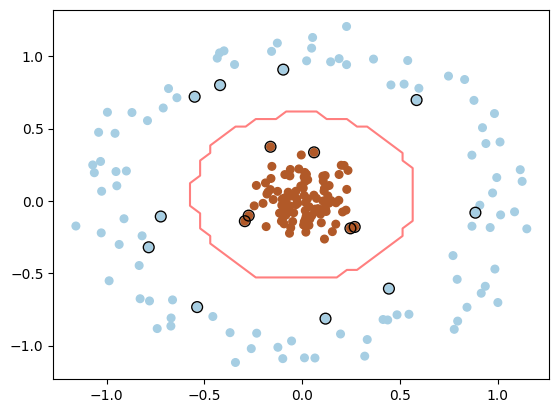

In [38]:
nonlinear_svm = svm.SVC(kernel='rbf')
nonlinear_svm.fit(x,y)
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_nl = nonlinear_svm.predict(xy).reshape(XX.shape)

n_classes = len(np.unique(y))
contours = ax.contour(XX, YY, z_nl, levels=np.arange(n_classes+1) - 0.5, cmap=plt.cm.get_cmap('rainbow', n_classes), alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(nonlinear_svm.support_vectors_[:,0], nonlinear_svm.support_vectors_[:,1], s=60, facecolors='none', edgecolors='k')
plt.show()

### Hyper-Plane, Support Vector

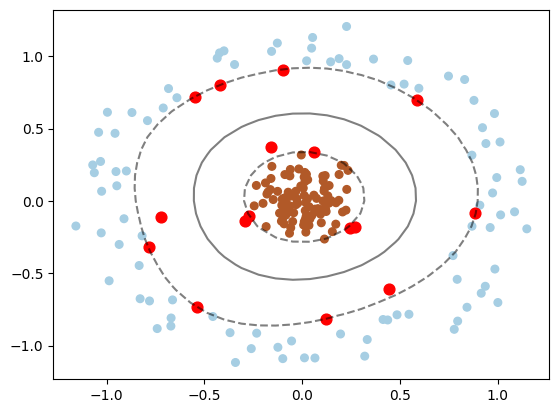

In [39]:
plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z_l = nonlinear_svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, z_l, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])

ax.scatter(nonlinear_svm.support_vectors_[:,0], nonlinear_svm.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

## ML 알고리즘 2: KMeans

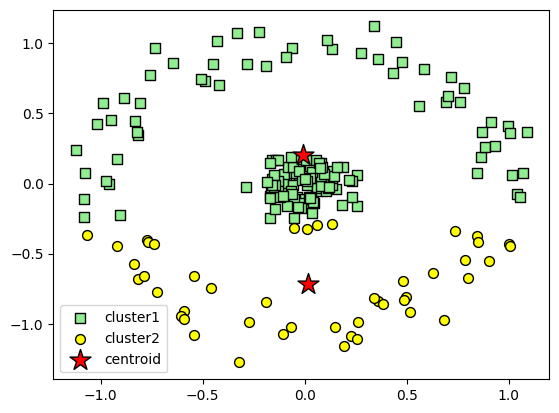

In [36]:
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=500, tol=1e-04, random_state=0)
y_km = km.fit_predict(x)

plt.scatter(x[y_km==0,0], x[y_km==0,1], s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster1')
plt.scatter(x[y_km==1,0], x[y_km==1,1], s=50, c='yellow', marker='o', edgecolors='black', label='cluster2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', edgecolors='black', label='centroid')
plt.legend(scatterpoints=1)
plt.show()

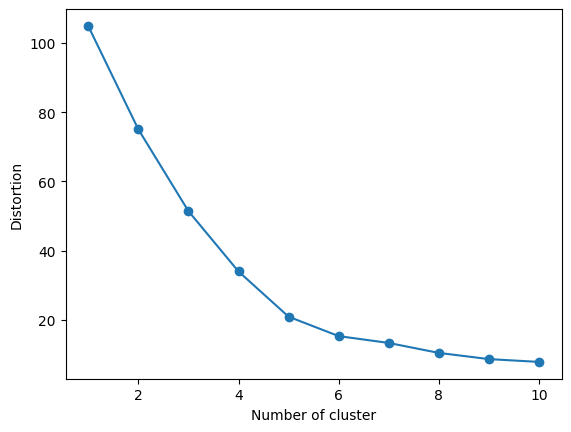

In [37]:
distortions = []
for i in range(1,11):
    km = KMeans(
        n_clusters=i,
        init='random',
        n_init=10,
        max_iter=500,
        tol=1e-04,
        random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()